## Chapter 4 -  Training Models

### Regularised Linear Models

A good wary to reduce overfitting is to regularise the model (to constrain it). The fewer degrees of freedom the model has, the harder it will be to overfit the data. As seen earlier, one way to regularise a model is to reduce the number of polynomial degrees.

There are other ways to regularise the model, in particular constraining the weights of the model. Three ways to do so are Ridge regression, Lasso regression and Elastic Net.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Ridge Regression

In Ridge Regression, a regularisation term equal to $\alpha \sum_{t=1}^n \theta_t^2$ is added to the cost function. The forces the learning algorithm to not only fit the data but keep the model weights as small as possible. 

The regularisation term should only be added during training. After training, the model's performance is evaluated using the unregularised performance measure. Recall that the cost function is the MSE:

$$\text{MSE} (\Theta) = \frac 1 m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{bmatrix}^2$$

The cost function , $J(\Theta)$ with the regularisation term is:

$$\begin{align}J(\Theta) &= \text{MSE} (\Theta) + \frac{\alpha}{2} \sum_{t=1}^n \theta_t^2 \\&= \frac 1 m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{bmatrix}^2  + \frac{\alpha}{2} \sum_{t=1}^n \theta_t^2\end{align}$$

The hyperparameter $\alpha$ controls how much to regularise the model. If $\alpha=0$ then Ridge regression is just Linear regression. If $\alpha$ is large, then all weights end up very close to $0$ and the result is a flat line going through the data's mean.

Note that the bias term $\theta_0$ is not regularized. If we define $\mathbf w$ as the feature weights then the regularisation term is simply $\frac12(||\mathbf w||_2)^2$ where $||\mathbf w||$ is the $l_2$ norm of the weight vector.

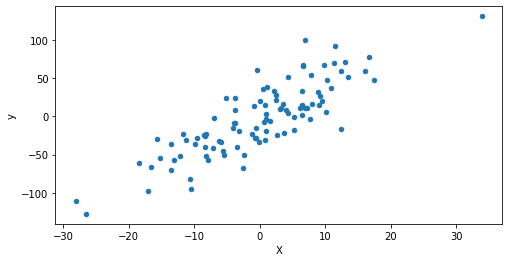

In [2]:
# Generate y = X^2 - 6X + 5 with noise N(0,1)
m = 100
X = np.random.normal(0,10,m).flatten()
X_b = np.c_[np.ones((m,1)), X]
y = 4*X + np.random.normal(0,25,m).flatten()
df_Xy = pd.DataFrame({'X' : X, 'y' : y})
df_Xy.plot(kind='scatter', x='X', y='y', figsize=(8,4))
plt.show()

In [3]:
# Test the model using new X_test
lin_X = np.linspace(X.min(), X.max(),m)

In [4]:
# Linear Regression
reg1 = LinearRegression()
reg1.fit(X_b, y) # Train
print(reg1.intercept_, reg1.coef_)

-2.4534338757104934 [0.         4.01902892]


In [5]:
lin_X_1 = np.c_[np.ones((m,1)), lin_X]
pred1 = reg1.predict(lin_X_1)
df_results1 = pd.DataFrame({'X' : lin_X, 'y' : pred1})
print(df_results1.head()) # Test

           X           y
0 -28.075836 -115.291030
1 -27.449902 -112.775385
2 -26.823969 -110.259740
3 -26.198035 -107.744095
4 -25.572102 -105.228450


In [6]:
# Ridge
reg2 = Ridge(alpha=10000, solver='cholesky')
reg2.fit(X_b, y)
print(reg2.intercept_, reg2.coef_)

-2.4222155320282854 [0.         1.95835595]


In [7]:
lin_X_2 = np.c_[np.ones((m,1)), lin_X]
pred2 = reg2.predict(lin_X_2)
df_results2 = pd.DataFrame({'X' : lin_X, 'y' : pred2})
print(df_results2.head()) # Test

           X          y
0 -28.075836 -57.404696
1 -27.449902 -56.178895
2 -26.823969 -54.953094
3 -26.198035 -53.727294
4 -25.572102 -52.501493


In [8]:
# Ridge
reg3 = Ridge(alpha=100000, solver='cholesky')
reg3.fit(X_b, y)
print(reg3.intercept_, reg3.coef_)

lin_X_3 = np.c_[np.ones((m,1)), lin_X]
pred3 = reg3.predict(lin_X_3)
df_results3 = pd.DataFrame({'X' : lin_X, 'y' : pred3})
print(df_results3.head()) # Test

-2.397831416148858 [0.         0.34879944]
           X          y
0 -28.075836 -12.190667
1 -27.449902 -11.972342
2 -26.823969 -11.754017
3 -26.198035 -11.535691
4 -25.572102 -11.317366


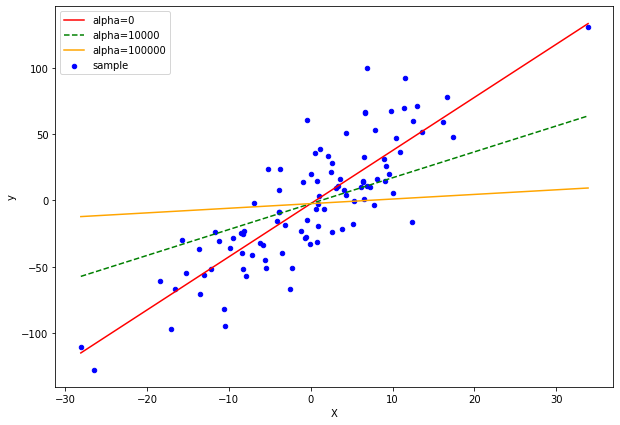

In [9]:
# Plotting for different alpha values
fig, ax = plt.subplots(figsize=(10,7))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax, color='blue')

df_results1.plot(kind='line', x='X', y='y', ax=ax, color='red')
df_results2.plot(kind='line', x='X', y='y', ax=ax, color='green', style='--')
df_results3.plot(kind='line', x='X', y='y', ax=ax, color='orange', style='-')
ax.legend(['alpha=0','alpha=10000', 'alpha=100000', 'sample'])
plt.show()

#### Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (Lasso Regression) is another regularized form of Linear Regression. Like Ridge regression, it adds a regularization term to the cost function, but uses the $l_1$ norm of the weight vector instaed of  of the $l_2$ norm. Again, from:
$$\text{MSE} (\Theta) = \frac 1 m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{bmatrix}^2$$

The cost function , $J(\Theta)$ with the regularisation term is:

$$\begin{align}J(\Theta) &= \text{MSE} (\Theta) + \alpha \sum_{t=1}^n |\theta_t| \\&= \frac 1 m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{bmatrix}^2  + \alpha \sum_{t=1}^n |\theta_t|\end{align}$$